Python notebook for exploratory data analysis of the City of Chicago Parking Ticket Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from scipy.stats import norm
#from sklearn.preprocessing import StandardScaler
#from scipy import stats

In [3]:
# read the dataframe
df_CCPT = pd.read_csv('./data/parking_tickets_frac.csv')

/home/chao/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_CCPT.head(5)

Unnamed: 0  ticket_number           issue_date  violation_location  \
0    19727593     9185717028  2014-08-05 21:26:00         1852 N MAUD   
1    19367998       64352592  2014-06-14 09:41:00    4057 N SUNNYSIDE   
2     5681589     9177655732  2009-01-07 19:56:00   3324 N HALSTED ST   
3    22647956     9188902856  2015-10-24 14:55:00  1953 N LACROSSE AV   
4     1161221     9058219394  2007-05-30 17:27:00     1151 W WAVELAND   

                                license_plate_number license_plate_state  \
0  1e55730db26522e18e6cc4e37db1d5e49a1e9740ef56b5...                  MI   
1  e2ceaa3ed4fba9fa9ddeb146a1218c43eedac433ebacef...                  IL   
2  c822dc8d016c735a2d95f33cd9fda4c89519c7aa8c1073...                  IL   
3  0dc52cb43957b09dfc5514e2080d5c1e2a8de3747fe144...                  IL   
4  c99f5ac386092c0274cc2b247e1a411baf8f3a1587965b...                  IL   

  license_plate_type    zipcode violation_code  \
0                PAS        NaN       0964090E   
1                PAS  605212454       0964040B   
2                PAS  606473722       0964200B   
3                PAS  606512031       0964190A   
4                PAS  600351014       0964090E   

                      violation_description               ...                 \
0                RESIDENTIAL PERMIT PARKING               ...                  
1                           STREET CLEANING               ...                  
2                PARK OUTSIDE METERED SPACE               ...                  
3  EXP. METER NON-CENTRAL BUSINESS DISTRICT               ...                  
4                RESIDENTIAL PERMIT PARKING               ...                  

  fine_level2_amount current_amount_due total_payments  ticket_queue  \
0                150                0.0           75.0          Paid   
1                120                0.0           60.0          Paid   
2                100                0.0           50.0          Paid   
3                100                0.0           50.0          Paid   
4                100                0.0           50.0          Paid   

     ticket_queue_date  notice_level  hearing_disposition notice_number  \
0  2014-08-18 00:00:00           NaN                  NaN             0   
1  2014-08-23 00:00:00           NaN                  NaN    5181940070   
2  2009-02-05 00:00:00          VIOL                  NaN    5105450510   
3  2015-10-29 00:00:00           NaN                  NaN    5131145590   
4  2007-06-26 00:00:00          VIOL                  NaN    5084345240   

  officer                          address  
0    1432         1800 n maud, chicago, il  
1   18937    4000 n sunnyside, chicago, il  
2    1030   3300 n halsted st, chicago, il  
3    1408  1900 n lacrosse av, chicago, il  
4     678     1100 w waveland, chicago, il  

[5 rows x 24 columns]

In [5]:
hd = {'Unique Entry': df_CCPT.nunique(axis = 0),
        'Nan Entry': df_CCPT.isnull().any()}
pd.DataFrame(data = hd, index = df_CCPT.columns.values)

# potential columns to drop: ticket_number,violation_location (since its normalized to address),license_plate_number,
# violation_code (violation_description is more accurate),  

Unique Entry  Nan Entry
Unnamed: 0                  5654516      False
ticket_number               5654516      False
issue_date                  2978168      False
violation_location          1461772      False
license_plate_number        3148505      False
license_plate_state              63       True
license_plate_type              152       True
zipcode                      752499       True
violation_code                  130      False
violation_description           128      False
unit                            373       True
unit_description                  6      False
vehicle_make                    175      False
fine_level1_amount               15      False
fine_level2_amount               16      False
current_amount_due            18838      False
total_payments                26346      False
ticket_queue                      7      False
ticket_queue_date              4159      False
notice_level                      5       True
hearing_disposition               2       True
notice_number               2977432      False
officer                       22021      False
address                      187498      False

In [6]:
to_drop = ['Unnamed: 0','ticket_number','license_plate_number','zipcode',
          'unit','unit_description','notice_number','violation_location']
df_CCPT.drop(labels=to_drop ,axis = 1,inplace = True)

In [7]:
row2drop= ['license_plate_state']
df_CCPT.dropna(axis = 0, how = 'any', subset = row2drop, inplace = True)

In [8]:
df_CCPT['license_plate_state'].isnull().any()

False

In [9]:
df_CCPT['license_plate_state'].value_counts().head(10)

IL    5137950
IN     112425
WI      62219
MI      58556
OH      31061
TX      24428
IA      22805
CA      21042
FL      19406
MO      17221
Name: license_plate_state, dtype: int64

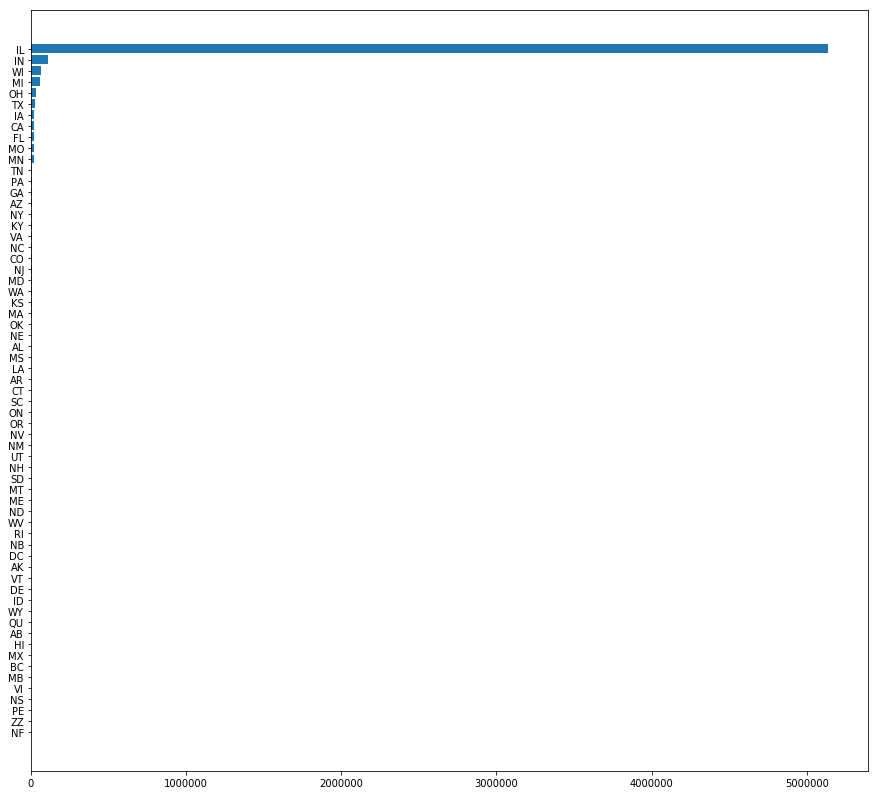

In [10]:
x_ticks = df_CCPT['license_plate_state'].value_counts().index
heights = df_CCPT['license_plate_state'].value_counts()
y_pos = np.arange(len(x_ticks))
fig = plt.figure(figsize=(15,14)) 
# set horizontal bars
plt.barh(y_pos, heights)
 
# set names on the y-axis
plt.yticks(y_pos, x_ticks)
plt.gca().invert_yaxis() 
# plot figure
plt.show()

In [11]:
df_CCPT['issue_date'] = pd.to_datetime(df_CCPT['issue_date'])
df_CCPT['issue_date'].head(5)


0   2014-08-05 21:26:00
1   2014-06-14 09:41:00
2   2009-01-07 19:56:00
3   2015-10-24 14:55:00
4   2007-05-30 17:27:00
Name: issue_date, dtype: datetime64[ns]

In [12]:
# Getting the data from year 2016 and 2017
mask16 = ((df_CCPT['issue_date'] >= pd.Timestamp(2016,1,1,0)) & (df_CCPT['issue_date'] <pd.Timestamp(2018,1,1,0)))
df_CCPT16 = df_CCPT.loc[mask16]

/home/chao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


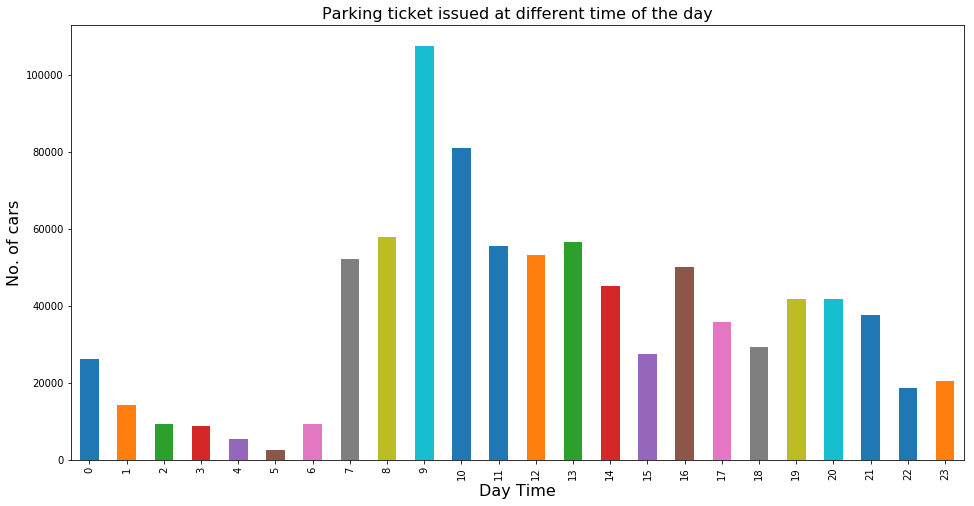

In [13]:
plt.figure(figsize=(16,8))
df_CCPT16['issue_date'].groupby(df_CCPT16['issue_date'].dt.hour).count().plot(kind='bar')
plt.tick_params(labelbottom='on')
plt.ylabel('No. of cars', fontsize=16);
plt.xlabel('Day Time', fontsize=16);
plt.title('Parking ticket issued at different time of the day', fontsize=16);

/home/chao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


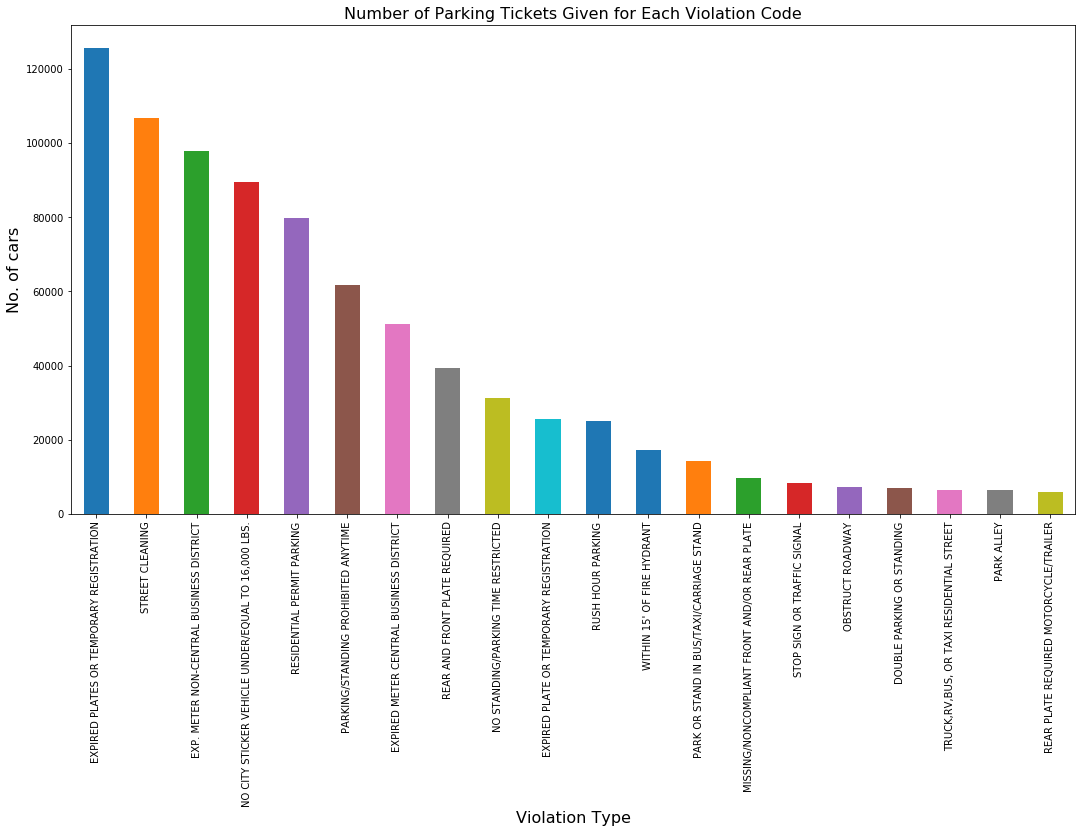

In [14]:
plt.figure(figsize=(18,9))
df_CCPT16['violation_description'].value_counts().head(20).plot(kind='bar')
plt.tick_params(labelbottom='on')
plt.ylabel('No. of cars', fontsize=16);
plt.xlabel('Violation Type', fontsize=16);
plt.title('Number of Parking Tickets Given for Each Violation Code', fontsize=16);

In [15]:
violation_type = df_CCPT16['violation_description'].value_counts().index
ticket_status = df_CCPT16['ticket_queue'].value_counts().index
# Here I categorize the ticket status in to 4:
# Paid, Dissmissed, Likely to be Guilty (Notice), Unlikely to pay (the rest: Define, Court, Bankrupcy,Hearing Req)
count_by_vt = np.zeros([20,4])

for vt_index in np.arange(20):
    mask = (df_CCPT16['violation_description'] == violation_type[vt_index])
    count_by_vt[vt_index,0] = np.count_nonzero(df_CCPT16.loc[mask]['ticket_queue'] == 'Paid')
    count_by_vt[vt_index,1] = np.count_nonzero(df_CCPT16.loc[mask]['ticket_queue'] == 'Dismissed')
    count_by_vt[vt_index,2] = np.count_nonzero(df_CCPT16.loc[mask]['ticket_queue'] == 'Notice') 
    count_by_vt[vt_index,3] = df_CCPT16.loc[mask]['ticket_queue'].size - np.sum(count_by_vt[vt_index,0:3])

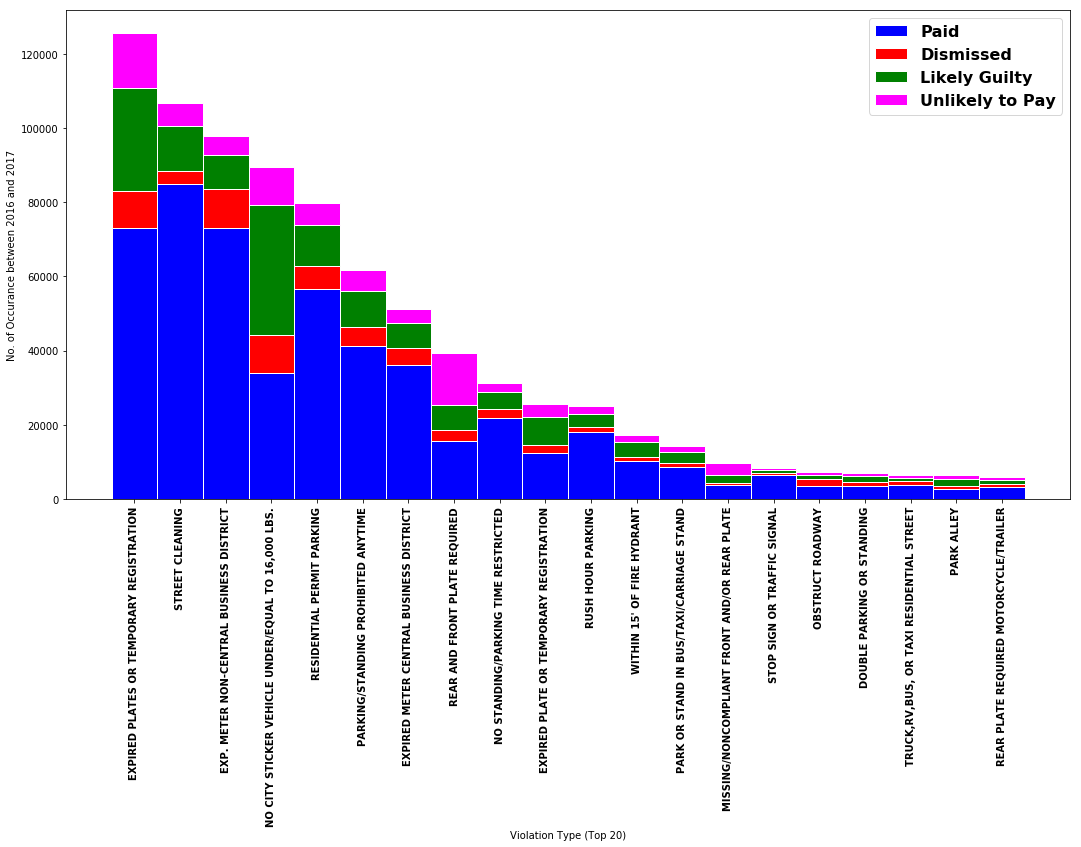

In [16]:
from matplotlib import rc

plt.figure(figsize=(18,9))
plt.tick_params(labelbottom=True)
rc('font',weight = 'bold')
r = np.arange(20)
# bar width
BW = 1

plt.bar(r, count_by_vt[:,0], color='blue', edgecolor='white', width=BW,label = 'Paid')
plt.bar(r, count_by_vt[:,1], bottom=count_by_vt[:,0], color='red', edgecolor='white', width=BW,label='Dismissed')
plt.bar(r, count_by_vt[:,2], bottom=np.sum(count_by_vt[:,0:2],axis = 1), color='green', edgecolor='white', width=BW,label='Likely Guilty')
plt.bar(r, count_by_vt[:,3], bottom=np.sum(count_by_vt[:,0:3],axis = 1), color='magenta', edgecolor='white', width=BW,label='Unlikely to Pay')

plt.xticks(r, violation_type[:20], fontweight='bold',rotation='vertical')
plt.xlabel("Violation Type (Top 20)")
plt.ylabel("No. of Occurance between 2016 and 2017")
plt.legend(fontsize = 16)
plt.show()

In [ ]:
hd = {'Unique Entry': df_CCPT.nunique(axis = 0),
        'Nan Entry': df_CCPT.isnull().any()}
pd.DataFrame(data = hd, index = df_CCPT16.columns.values)


In [17]:
fine_amount = df_CCPT16[['fine_level1_amount','fine_level2_amount','current_amount_due','total_payments']]

In [18]:
# fine_level2 is always twice the fine_level1, which makes it not helpful here
np.mean(fine_amount['fine_level2_amount']//fine_amount['fine_level1_amount'])

2.0

In [19]:
fine_amount['final_amount'] = fine_amount['current_amount_due'] + fine_amount['total_payments']
fine_amount['due_or_not'] = fine_amount['current_amount_due'] > 0

/home/chao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/chao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


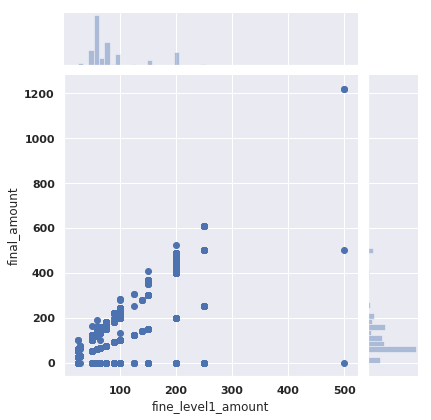

In [20]:
sns.set()
#ax = sns.scatterplot(x=fine_amount['fine_level1_amount'], y = fine_amount['final_amount'], hue=fine_amount['due_or_not'],data=tips)

ax = sns.jointplot(x = 'fine_level1_amount', y = 'final_amount',data=fine_amount[:10000])

In [21]:
fine_level = np.sort(df_CCPT16['fine_level1_amount'].unique())
fine_due_or_not = np.zeros([np.size(fine_level),2])

for fl_indx in np.arange(np.size(fine_level)):
    mask = (df_CCPT16['fine_level1_amount'] == fine_level[fl_indx])
    fine_due_or_not[fl_indx,0] = np.count_nonzero(df_CCPT16.loc[mask]['current_amount_due'] <= 0 ) # paid
    fine_due_or_not[fl_indx,1] = np.count_nonzero(df_CCPT16.loc[mask]['current_amount_due'] > 0 ) # due

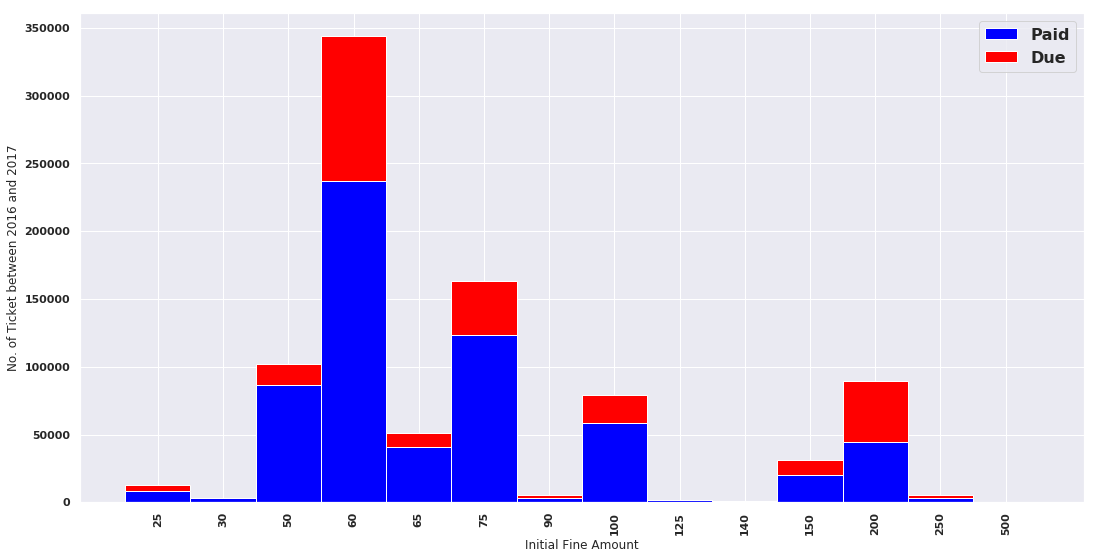

In [22]:
plt.figure(figsize=(18,9))
plt.tick_params(labelbottom=True)
rc('font',weight = 'bold')
r = np.arange(np.size(fine_level))
# bar width
BW = 1

plt.bar(r, fine_due_or_not[:,0], color='blue', edgecolor='white', width=BW,label = 'Paid')
plt.bar(r, fine_due_or_not[:,1], bottom=fine_due_or_not[:,0], color='red', edgecolor='white', width=BW,label='Due')

plt.xticks(r, fine_level, fontweight='bold',rotation='vertical')
plt.xlabel("Initial Fine Amount")
plt.ylabel("No. of Ticket between 2016 and 2017")
plt.legend(fontsize = 16)
plt.show()



In [23]:
 np.sort(df_CCPT16['fine_level1_amount'].unique())

array([ 25,  30,  50,  60,  65,  75,  90, 100, 125, 140, 150, 200, 250,
       500])

In [24]:
df_CCPT16['address'].head()

10              500 e 46, chicago, il
13     6100 s archer ave, chicago, il
20    4200 w irving park, chicago, il
25          1700 w grand, chicago, il
42       2200 n st louis, chicago, il
Name: address, dtype: object

In [25]:
address_df = pd.DataFrame(df_CCPT16['address'].str.split(', ').tolist(), columns=['address','city','state','None'])
#adderss_df.drop(columns = 'None',inplace = True)

In [27]:
address_df.head()

address      city state  None
0            500 e 46   chicago    il  None
1   6100 s archer ave   chicago    il  None
2  4200 w irving park   chicago    il  None
3        1700 w grand   chicago    il  None
4     2200 n st louis   chicago    il  None

In [28]:
address_df['city'].value_counts()

 chicago    889767
 louis           1
Name: city, dtype: int64

In [30]:
mask = (address_df['state']==' chicago')
address_df.loc[mask]

address    city     state None
137135  600 n st   louis   chicago   il

In [31]:
# found anomoly here, change it
mask_add = (df_CCPT16['address'] == '600 n st, louis, chicago, il')
# I know this looks ugly, I haven't found a better way :(
df_CCPT16['address'] = df_CCPT16['address'].str.replace('600 n st, louis, chicago, il','600 n st louis, chicago, il')

/home/chao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [32]:
df_CCPT16.loc[mask_add]['address']

871103    600 n st louis, chicago, il
Name: address, dtype: object

In [33]:
address_df = pd.DataFrame(df_CCPT16['address'].str.split(', ').tolist(), columns=['address','city','state'])

In [34]:
address_df['city'].value_counts()
# now the address should have been cleaned

chicago    889768
Name: city, dtype: int64

In [35]:
address_df['state'].unique()
print('Number of unique addresses: {}'.format(len(address_df['address'].unique())))

Number of unique addresses: 71689


In [36]:
address_df = pd.DataFrame(address_df['address'].unique(), columns=['address'])
address_df['lat'] = np.nan
address_df['lng'] = np.nan
address_df.head()

address  lat  lng
0            500 e 46  NaN  NaN
1   6100 s archer ave  NaN  NaN
2  4200 w irving park  NaN  NaN
3        1700 w grand  NaN  NaN
4     2200 n st louis  NaN  NaN

In [37]:
import geocoder
import requests
import time

In [38]:
class GeoSessions:
    def __init__(self):
        self.Arcgis = requests.Session()
        self.Komoot = requests.Session()
        self.USCensus = requests.Session()
        self.OSM = requests.Session()

def create_sessions():
    return GeoSessions()

def geocode_address(address, s):
    g = geocoder.komoot(address, session=s.Komoot)
    if (g.ok == False):        
        g = geocoder.osm(address, session=s.OSM)
    if (g.ok == False):
        g = geocoder.arcgis(address, session=s.Arcgis)
    if (g.ok == False):
        g = geocoder.uscensus(address, session=s.USCensus)
    return g

In [39]:
s = create_sessions()


In [40]:
addr = address_df['address'][0] + ', Chicago, IL'
tmp = geocode_address(addr, s)
print(addr)
print('Latitude:  {}'.format(tmp.lat))
print('Longitude: {}'.format(tmp.lng))

500 e 46, Chicago, IL
Latitude:  41.8349087
Longitude: -87.61417004242811


In [ ]:
failed_inds = []
iter_between_saves = 100

In [ ]:
missing_latlon_ind = address_df[address_df['lat'].isnull()][:60001].index.tolist()

for i in missing_latlon_ind:
    try:
        if i%iter_between_saves == 0:
            print('reached index {}, saving df'.format(i))
            address_df.to_csv('CCPT_frac_1617.csv', index=False)
        addr = address_df['address'][i] + ', Chicago, IL'
        tmp = geocode_address(addr, s)
        address_df.loc[i,'lat'] = tmp.lat
        address_df.loc[i,'lng'] = tmp.lng
    except Exception as e:
        failed_inds.append(i)
address_df.to_csv('CCPT_frac_1617.csv', index=False)

In [ ]:
address_df[address_df['lat'].isnull()]

In [41]:
# load the presaved df for geocoded df
df_geoloc = pd.read_csv('./data/Geocoded_CCPT_1617.csv')
df_geoloc['address'] = df_geoloc['address'] + ', chicago, il'


In [43]:
geocoded_df = pd.merge(left=df_CCPT16, right=df_geoloc, how='inner', on='address')
geocoded_df.head()

issue_date license_plate_state license_plate_type violation_code  \
0 2016-05-19 17:40:00                  IL                PAS       0976160A   
1 2016-01-30 00:34:00                  IL                TMP       0976160F   
2 2016-11-05 20:35:00                  IL                PAS       0964100C   
3 2016-05-27 17:30:00                  IL                PAS       0964050J   
4 2017-11-24 16:23:00                  IL                PAS       0964100C   

                      violation_description vehicle_make  fine_level1_amount  \
0             REAR AND FRONT PLATE REQUIRED         LNDR                  60   
1  EXPIRED PLATES OR TEMPORARY REGISTRATION         CHRY                  60   
2      BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE         HOND                 150   
3                     DISABLED PARKING ZONE         FORD                 250   
4      BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE         DODG                 150   

   fine_level2_amount  current_amount_due  total_payments ticket_queue  \
0                 120                60.0             0.0       Define   
1                 120               146.4             0.0       Notice   
2                 300                 0.0           150.0         Paid   
3                 500                 0.0           250.0         Paid   
4                 300               300.0             0.0       Notice   

     ticket_queue_date notice_level hearing_disposition officer  \
0  2016-05-25 00:00:00          NaN                 NaN   05238   
1  2016-02-11 00:00:00         FINL                 NaN   10109   
2  2016-11-15 00:00:00          NaN                 NaN    5121   
3  2016-06-07 00:00:00          NaN                 NaN    5652   
4  2017-12-21 00:00:00         FINL                 NaN    5652   

                          address        lat        lng  
0           500 e 46, chicago, il  41.834909 -87.614170  
1           500 e 46, chicago, il  41.834909 -87.614170  
2  6100 s archer ave, chicago, il  41.794587 -87.770287  
3  6100 s archer ave, chicago, il  41.794587 -87.770287  
4  6100 s archer ave, chicago, il  41.794587 -87.770287

In [57]:
import folium
import folium.plugins as plugins
import datetime
#from folium.plugins import HeatMap

In [45]:
chicago_lat = 41.8
chicago_lng = -87.7

In [47]:
df_permit = geocoded_df.loc[geocoded_df['violation_description'] == 'RESIDENTIAL PERMIT PARKING']
df_permit.head()
#df_CCPT16['issue_date'].groupby(df_CCPT16['issue_date'].dt.hour).count().plot(kind='bar')

issue_date license_plate_state license_plate_type violation_code  \
64  2017-11-17 18:07:00                  IL                PAS       0964090E   
720 2017-12-28 00:47:00                  IL                PAS       0964090E   
721 2016-02-12 00:45:00                  IL                PAS       0964090E   
722 2016-08-16 20:26:00                  IL                PAS       0964090E   
725 2016-10-07 17:37:00                  IL                PAS       0964090E   

          violation_description vehicle_make  fine_level1_amount  \
64   RESIDENTIAL PERMIT PARKING         TOYT                  75   
720  RESIDENTIAL PERMIT PARKING         VOLK                  75   
721  RESIDENTIAL PERMIT PARKING         NISS                  75   
722  RESIDENTIAL PERMIT PARKING         DODG                  75   
725  RESIDENTIAL PERMIT PARKING         PONT                  75   

     fine_level2_amount  current_amount_due  total_payments ticket_queue  \
64                  150                 0.0             0.0    Dismissed   
720                 150                 0.0            75.0         Paid   
721                 150                 0.0           150.0         Paid   
722                 150                 0.0            75.0         Paid   
725                 150                 0.0            75.0         Paid   

       ticket_queue_date notice_level hearing_disposition officer  \
64   2018-01-11 00:00:00         VIOL          Not Liable   11371   
720  2018-01-04 00:00:00          NaN                 NaN    1640   
721  2016-05-05 00:00:00         FINL                 NaN    1462   
722  2016-08-25 00:00:00          NaN                 NaN    1125   
725  2016-11-07 00:00:00         VIOL                 NaN     767   

                                 address        lat        lng  
64          2200 n st louis, chicago, il  41.928285 -87.714662  
720  800 s oakley boulevard, chicago, il  41.871201 -87.684071  
721  800 s oakley boulevard, chicago, il  41.871201 -87.684071  
722         1700 w cornelia, chicago, il  41.943056 -87.813918  
725         1700 w cornelia, chicago, il  41.943056 -87.813918

In [48]:
df_permit_hm = df_permit[['lat','lng']]

In [49]:
# There are quite some outliers, here I will just remove the ones outside Chicago, 
# later I will do the more careful cleaning

mask_chi = ((df_permit['lat']>=41.63) & (df_permit['lat']<= 42.05) &
               (df_permit['lng']>= -88.0) & (df_permit['lng']<= -87.5))
df_permit_hm = df_permit_hm.loc[mask_chi]

In [50]:
permit_data = [[row['lat'],row['lng']] for index, row in df_permit_hm.iterrows()]

In [51]:
np.size(permit_data)

152046

In [52]:
m = folium.Map([chicago_lat,chicago_lng],  tiles = "Stamen Toner",zoom_start=10)
hm = plugins.HeatMap(permit_data,radius = 9)
hm.add_to(m)
m

In [53]:
df_permit['Weight'] = df_permit['issue_date'].dt.hour
df_permit['Weight'] = df_permit['Weight'].astype(float)
df_permit_hmt = df_permit[['lat','lng','Weight']]

/home/chao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/chao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [55]:
permit_timeseries = [[[row['lat'],row['lng']] 
                           for index, row in df_permit_hmt[df_permit_hmt['Weight'] == i].iterrows()] for i in range(0,24)]

In [58]:
hours_indx = [(datetime.time(i).strftime('%I %p')) for i in range(24)]
mt = folium.Map([chicago_lat,chicago_lng],tiles = "Stamen Toner",zoom_start=10)
hmt = plugins.HeatMapWithTime(permit_timeseries,auto_play=True,radius = 5, min_opacity = 1,index = hours_indx)
hmt.add_to(mt)
mt

/home/chao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


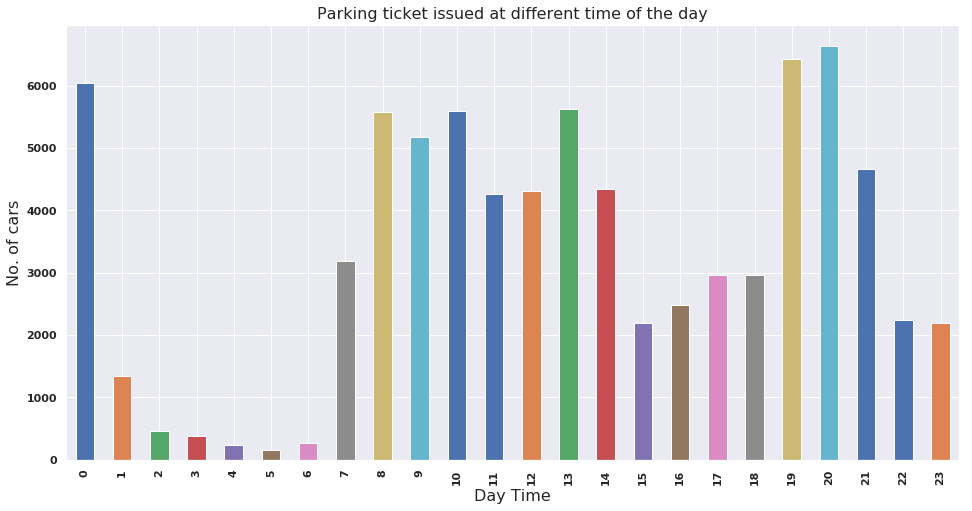

In [59]:
plt.figure(figsize=(16,8))
df_permit['issue_date'].groupby(df_permit['issue_date'].dt.hour).count().plot(kind='bar')
plt.tick_params(labelbottom='on')
plt.ylabel('No. of cars', fontsize=16);
plt.xlabel('Day Time', fontsize=16);
plt.title('Parking ticket issued at different time of the day', fontsize=16);
